# Part 1: Data loading and Initial Exploration

### Read Data

The table above shows the State of the Union dataset after loading it from `data/SOTU.csv`.  
Each row corresponds includes the president’s name, the year of the address, the full text, and a word count.  

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


# Exploratory Data Analysis

## Number of Speeches per President

From the chart, George Washington has the highest count with around 12 speeches per president, followed closely by Franklin D. Roosevelt. In contrast, William Henry Harrison delivered only one speech, reflecting his very short time in office. Overall, the number of speeches largely mirrors the length of each presidency ( e.g. long-serving presidents gave more addresses, while short-term presidents gave fewer. )

In [7]:
speeches_per_pres = sou["President"].value_counts().reindex(sou["President"].drop_duplicates())

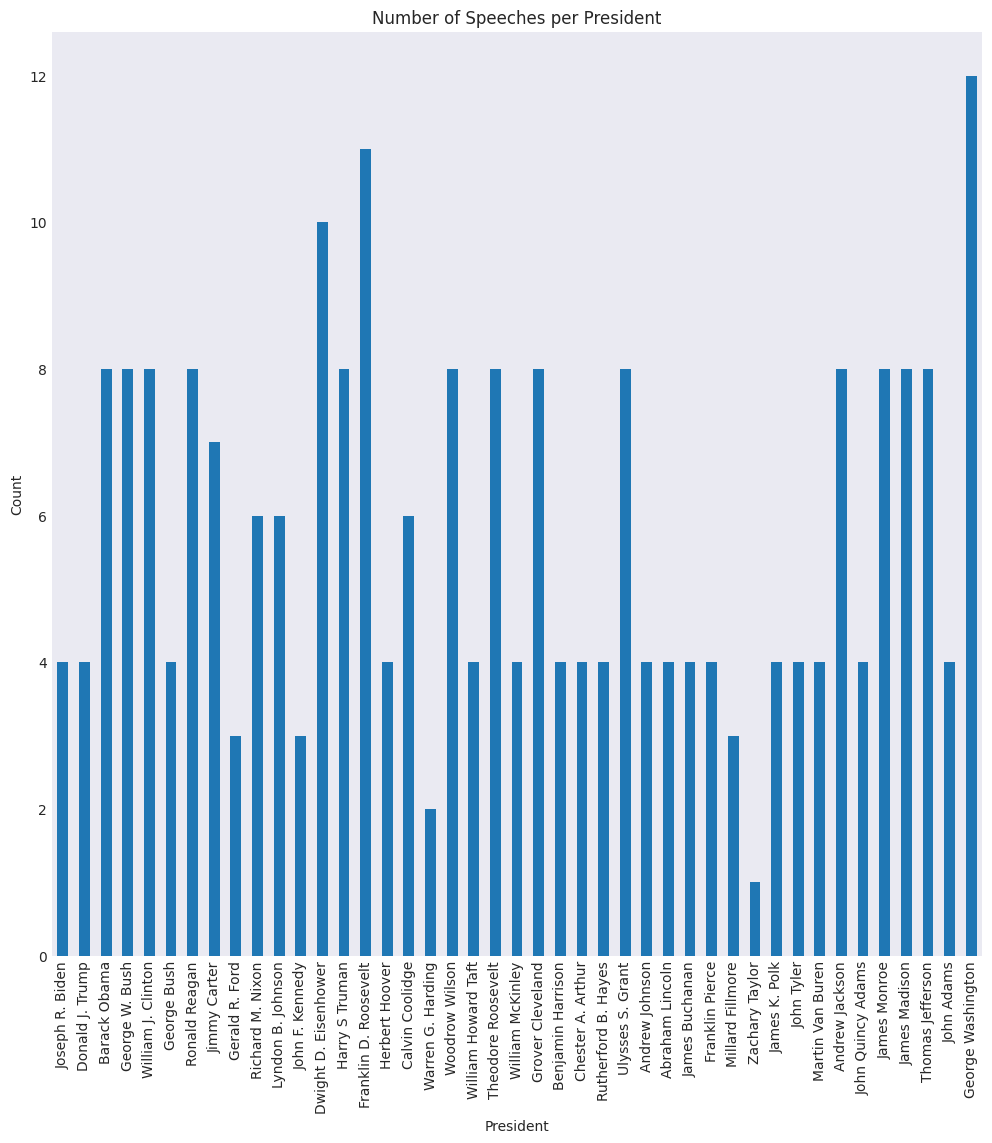

In [8]:
speeches_per_pres.plot(kind="bar",figsize=(12, 12))
plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Count")
plt.savefig('outputs/01-01_Speeches per president.png')

## Number of Speeches per Year

From the plot, most years have exactly one State of the Union Speeches per Year. Only the earliest years show more than one, with counts reaching up to four at the very beginning of the timeline. In the mid-20th century, a few years have two addresses, but afterward the pattern returns to a consistent one speech per year.

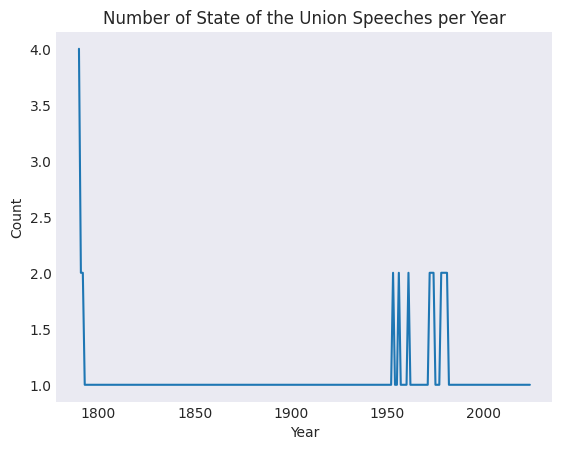

In [9]:
speeches_per_year = sou["Year"].value_counts().sort_index()
speeches_per_year.plot()  
plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count");
plt.savefig('outputs/01-02_SOTU speeches per year.png')

## Word Count Distribution 

The distribution is heavily right-skewed : Most speeches fall between 3,000 and 10,000 words, with the largest concentration around 2,500–6,000 words. A smaller number of speeches are much longer, reaching 20,000–30,000 words.

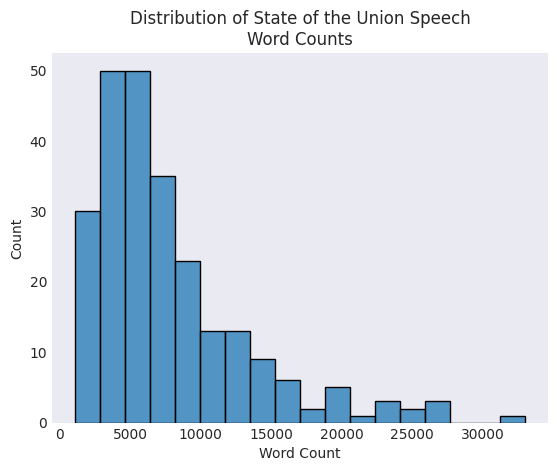

In [5]:
sns.histplot(sou["Word Count"])

plt.title("Distribution of State of the Union Speech\nWord Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.savefig('outputs/01-03_SOTU speech word count distribution.png')

## Word Count Distribution over Year

From 1800 to about 1825, speeches were generally short, mostly under 5,000 words. Between 1825 and 1900, word counts increased, and after 1900 most speeches clustered around 5,000 words. A few mid-20th-century speeches became extremely long, while modern speeches typically fall between 5,000 and 10,000 words.

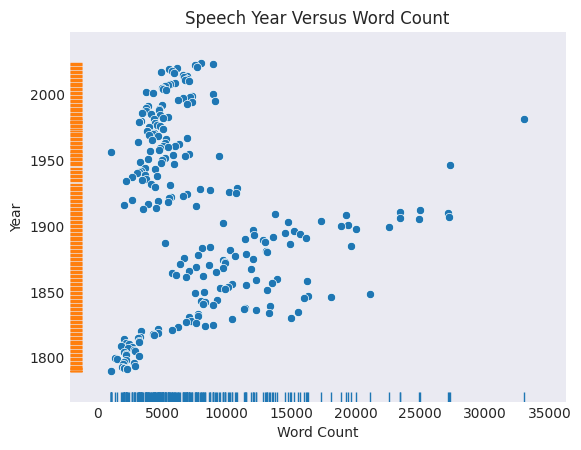

In [6]:
sns.scatterplot(data=sou, x="Word Count", y="Year")

sns.rugplot(data=sou, x="Word Count")
sns.rugplot(data=sou, y="Year")

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year");
plt.savefig('outputs/01-04_Speech year versus word count.png')

## Word Count Distribution per President

Average word counts vary a lot across presidents. Woodrow Wilson, along with William Howard Taft James K.polk , and Theodore Roosevelt, has the highest average word counts by far, with speeches well above those of other presidents. In contrast, modern presidents like Biden, Obama, and George W. Bush average around 4,000–8,000 words, and early presidents such as George Washington and John Adams have much shorter average speeches.

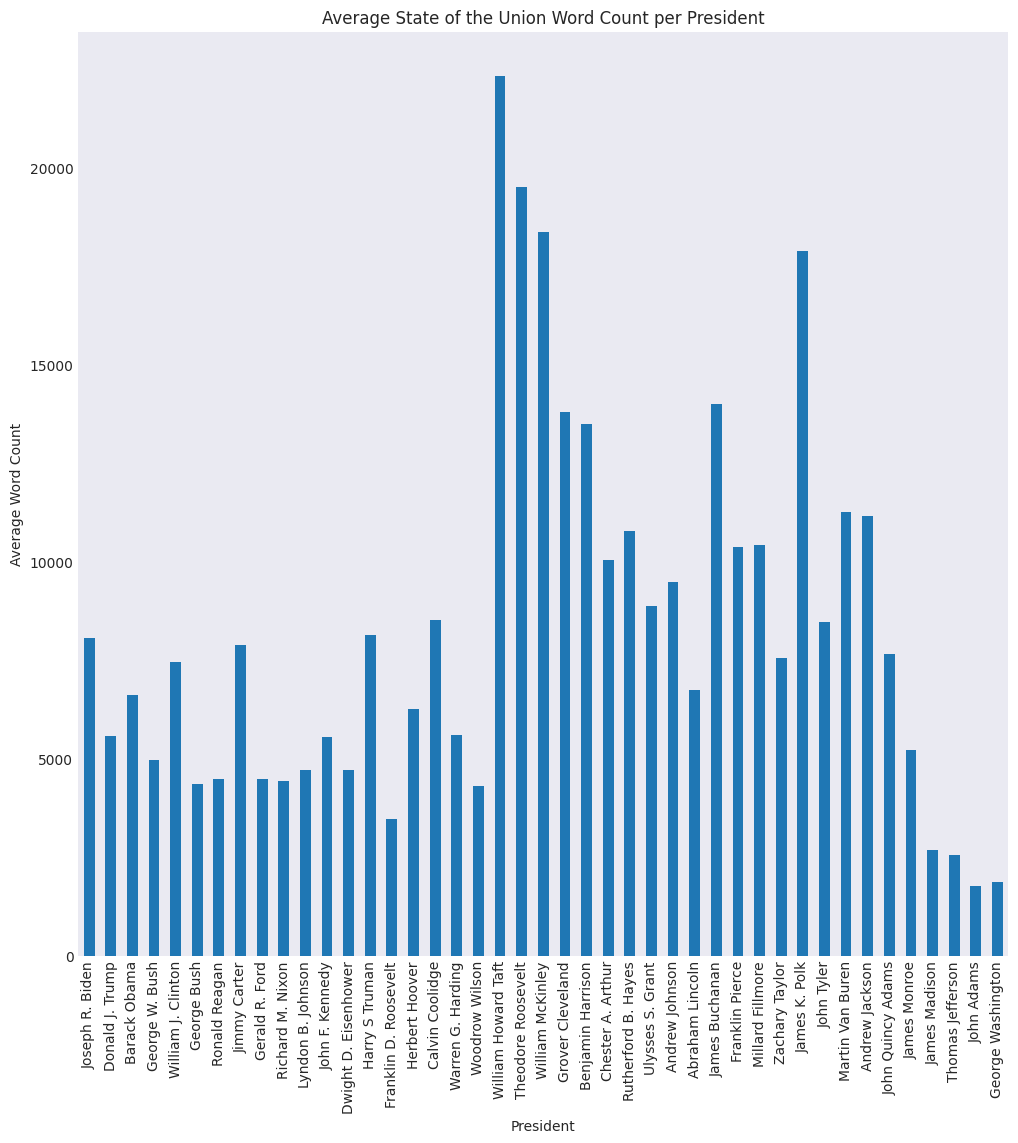

In [7]:
avg_wc = sou.groupby("President")["Word Count"].mean().reindex(sou["President"].drop_duplicates())

plt.figure()
ax = avg_wc.plot(kind="bar",figsize=(12, 12))

ax.set_title("Average State of the Union Word Count per President")
ax.set_xlabel("President")
ax.set_ylabel("Average Word Count")
plt.savefig('outputs/01-05_Average SOTU word count per president.png')